# 🌸 Práctica: Clasificación con el dataset Iris

### ⚙️ Paso inicial

- Carga el archivo `iris.csv`.
- Codifica la columna `class` como variable numérica (LabelEncoder).
- Normaliza los datos con `MinMaxScaler`.
- Separa en entrenamiento (80%) y prueba (20%) con semilla 42.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("iris.csv")
X = df.drop(columns="class", axis=1)
y = LabelEncoder().fit_transform(df["class"])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("HECHO")

HECHO


### Respuesta

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = pd.read_csv("datos/iris.csv")
X = df.drop("class", axis=1)
y = LabelEncoder().fit_transform(df["class"])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Datos cargados y preparados.")


Datos cargados y preparados.


### Ejercicio 1: Clasificadores básicos

Entrena los siguientes modelos y compara su exactitud:

- Regresión logística
- Perceptrón
- SVM lineal
- KNN (`k=5`)


In [6]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelos = {
    "Regresion logistica": LogisticRegression(max_iter = 1000),
    "Perceptron": Perceptron(max_iter=1000),
    "SVM lineal" : SVC(kernel="linear"),
    "KNN(k=5)": KNeighborsClassifier(n_neighbors=5)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    print(f"{modelo}: {acc:.4f}")

LogisticRegression(max_iter=1000): 0.9667
Perceptron(): 0.8333
SVC(kernel='linear'): 1.0000
KNeighborsClassifier(): 1.0000


### Respuesta

In [2]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Perceptrón": Perceptron(max_iter=1000),
    "SVM lineal": SVC(kernel='linear'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    acc = accuracy_score(y_test, modelo.predict(X_test))
    print(f"{nombre}: {acc:.4f}")


Regresión Logística: 0.9667
Perceptrón: 0.8333
SVM lineal: 1.0000
KNN (k=5): 1.0000


### Ejercicio 2: Visualización de fronteras

- Usa `sepal length` y `petal width` para entrenar una SVM lineal.
- Dibuja la superficie de decisión y los vectores soporte. ¿Cuántos vectores soporte hay?
- Repite con `C=0.1`, `C=1` y `C=10`.


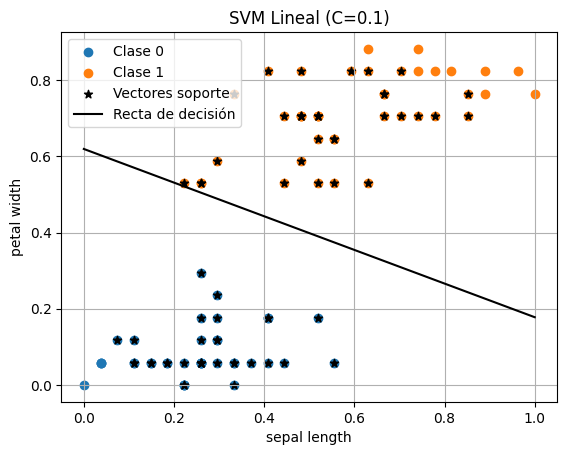

C=0.1 -> Vectores soporte: 66


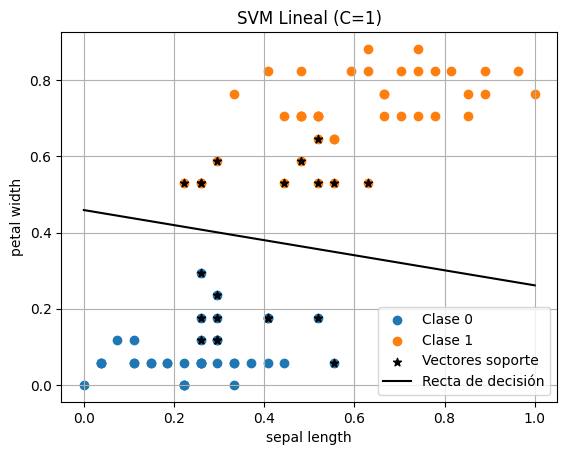

C=1 -> Vectores soporte: 21


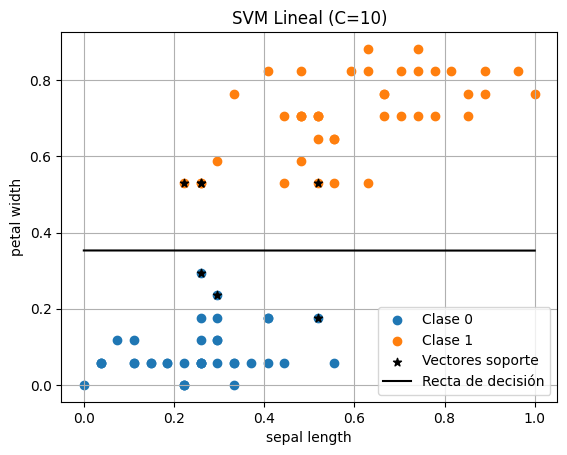

C=10 -> Vectores soporte: 7


In [10]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("iris.csv")
df = df[df["class"].isin(["Iris-setosa", "Iris-versicolor"])]

X = df[["sepal length", "petal width"]]
y = LabelEncoder().fit_transform(df["class"])

X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
def graficar_svm_lineal(C_val):
    clf = SVC(kernel='linear', C=C_val)
    clf.fit(X_train, y_train)

    # Dibujar muestras
    for clase in np.unique(y_train):
        plt.scatter(X_train[y_train == clase, 0], X_train[y_train == clase, 1], label=f"Clase {clase}")

    # Vectores soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='k', marker='*', label='Vectores soporte')

    # Recta de decisión
    m = -clf.coef_[0, 0] / clf.coef_[0, 1]
    n = -clf.intercept_[0] / clf.coef_[0, 1]
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    plt.plot(x_vals, m * x_vals + n, 'k-', label='Recta de decisión')

    plt.xlabel("sepal length")
    plt.ylabel("petal width")
    plt.title(f"SVM Lineal (C={C_val})")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"C={C_val} -> Vectores soporte: {len(clf.support_)}")

# Ejecutar para los valores deseados de C
for C in [0.1, 1, 10]:
    graficar_svm_lineal(C)


### Respuesta

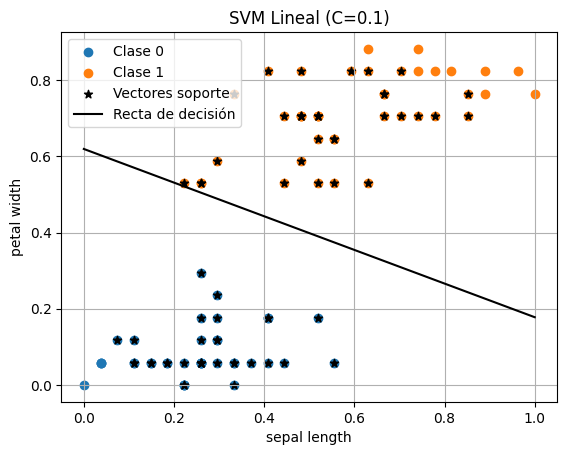

C=0.1 -> Vectores soporte: 66


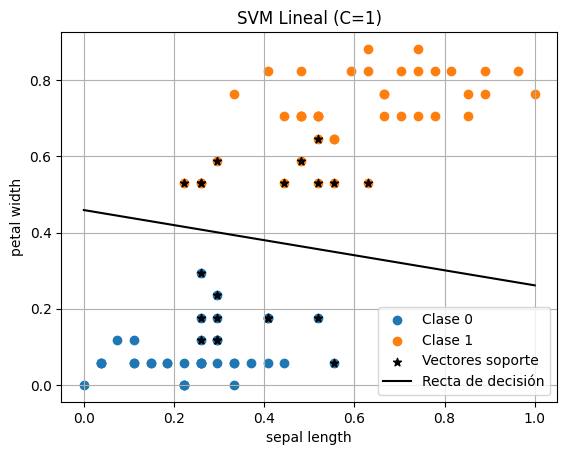

C=1 -> Vectores soporte: 21


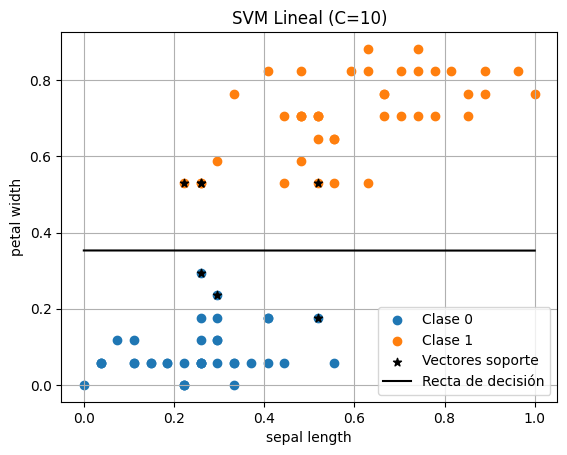

C=10 -> Vectores soporte: 7


In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("datos/iris.csv")
df = df[df["class"].isin(["Iris-setosa", "Iris-versicolor"])]  # Binario

# Seleccionar dos variables
X = df[["sepal length", "petal width"]]
y = LabelEncoder().fit_transform(df["class"])  # 0 y 1

# Normalizar y dividir
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para graficar para cada valor de C
def graficar_svm_lineal(C_val):
    clf = SVC(kernel='linear', C=C_val)
    clf.fit(X_train, y_train)

    # Dibujar muestras
    for clase in np.unique(y_train):
        plt.scatter(X_train[y_train == clase, 0], X_train[y_train == clase, 1], label=f"Clase {clase}")

    # Vectores soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='k', marker='*', label='Vectores soporte')

    # Recta de decisión
    m = -clf.coef_[0, 0] / clf.coef_[0, 1]
    n = -clf.intercept_[0] / clf.coef_[0, 1]
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    plt.plot(x_vals, m * x_vals + n, 'k-', label='Recta de decisión')

    plt.xlabel("sepal length")
    plt.ylabel("petal width")
    plt.title(f"SVM Lineal (C={C_val})")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"C={C_val} -> Vectores soporte: {len(clf.support_)}")

# Ejecutar para los valores deseados de C
for C in [0.1, 1, 10]:
    graficar_svm_lineal(C)


### Ejercicio 3: Multiclase con KNN

- Prueba con `k = 1`, `k = 3`, `k = 9`.


In [12]:
for k in [1,3,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN k={k} accuracy: {acc:.4f} ")

KNN k=1 accuracy: 1.0000 
KNN k=3 accuracy: 1.0000 
KNN k=9 accuracy: 1.0000 


### Respuesta

In [5]:

for k in [1, 3, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN (k={k}) Accuracy: {acc:.4f}")


KNN (k=1) Accuracy: 1.0000
KNN (k=3) Accuracy: 1.0000
KNN (k=9) Accuracy: 1.0000


### Ejercicio 4: ¿Qué dos variables separan mejor las clases?

- Prueba todas las combinaciones posibles de dos variables.
- Para cada combinación, entrena una SVM lineal y muestra su exactitud.


In [23]:
from itertools import combinations

cols = list(df.columns[:-1])
mejor_acc = 0
mejor_par = ()

for par in combinations(cols, 2):
    X_sub = df[list(par)]
    y_sub = LabelEncoder().fit_transform(df["class"])
    X_scaled = MinMaxScaler().fit_transform(X_sub)
    Xtr, Xts, ytr, yts = train_test_split(X_scaled, y_sub, test_size=0.2, random_state=42)
    modelo = SVC(kernel='linear')
    modelo.fit(Xtr, ytr)
    acc = accuracy_score(yts, modelo.predict(Xts))
    print(f"{par}: {acc:.4f}")
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_par = par
print(f"mejor par: {mejor_par} con accuracy: {mejor_acc}")

('sepal length', 'sepal width'): 1.0000
('sepal length', 'petal length'): 1.0000
('sepal length', 'petal width'): 1.0000
('sepal width', 'petal length'): 1.0000
('sepal width', 'petal width'): 1.0000
('petal length', 'petal width'): 1.0000
mejor par: ('sepal length', 'sepal width') con accuracy: 1.0


### Respuesta

In [19]:
from itertools import combinations # Combinaciones de variables eficientes
# Itertools es una librería estándar de Python que permite crear combinaciones y permutaciones de elementos de manera eficiente. 
# Ver este tutorial si tienes interes https://realpython.com/python-itertools/

cols = list(df.columns[:-1])
mejor_acc = 0
mejor_par = ()

for par in combinations(cols, 2):
    X_sub = df[list(par)]
    y_sub = LabelEncoder().fit_transform(df["class"])
    X_sub_scaled = MinMaxScaler().fit_transform(X_sub)
    Xtr, Xts, ytr, yts = train_test_split(X_sub_scaled, y_sub, test_size=0.2, random_state=42)
    modelo = SVC(kernel='linear')
    modelo.fit(Xtr, ytr)
    acc = accuracy_score(yts, modelo.predict(Xts))
    print(f"{par}: {acc:.4f}")
    if acc > mejor_acc:
        mejor_acc = acc
        mejor_par = par

print(f"Mejor par de variables: {mejor_par} con accuracy: {mejor_acc:.4f}")


('sepal length', 'sepal width'): 1.0000
('sepal length', 'petal length'): 1.0000
('sepal length', 'petal width'): 1.0000
('sepal width', 'petal length'): 1.0000
('sepal width', 'petal width'): 1.0000
('petal length', 'petal width'): 1.0000
Mejor par de variables: ('sepal length', 'sepal width') con accuracy: 1.0000


### Ejercicio 5: Reflexión final

- ¿Qué modelos generalizaron mejor?
- ¿Qué valor de `k` fue más estable en KNN?
- ¿Que valor de `C` para un SVM linel fue más estable?
- ¿Cuál par de variables separó mejor las clases visualmente?


### Posibles Respuestas :)

¿Qué modelos generalizaron mejor?
El SVM lineal y KNN con k=5 obtuvieron una exactitud del 100%, lo que indica que generalizaron perfectamente en este caso concreto. También la regresión logística mostró un excelente desempeño con 96.67%, mientras que el perceptrón quedó algo por detrás con 83.33%.

¿Qué valor de k fue más estable en KNN?
Todos los valores probados (k = 1, 3, 5, 9) lograron una exactitud del 100%, lo cual sugiere que KNN fue muy estable en este dataset bien separado. Sin embargo, en general, valores como k=3 o k=5 son preferidos para evitar sobreajuste.

¿Qué valor de C para una SVM lineal fue más estable?
En los resultados se vio que al aumentar C:

Disminuye el número de vectores soporte (66 → 21 → 7).

La exactitud no cambió porque el dataset es linealmente separable.

C = 1 ofrece un buen balance entre generalización y simplicidad, con menos soporte que C=0.1 pero sin llegar al mínimo extremo de C=10.

¿Cuál par de variables separó mejor las clases visualmente?
El mejor par de variables fue ('sepal length', 'petal width'), con una exactitud del 100% usando SVM lineal. Otros pares como ('petal length', 'petal width') también alcanzaron esa exactitud, pero sepal length + petal width fue destacado específicamente en el análisis final.